In [2]:
#Inspiration: https://markroxor.github.io/gensim/static/notebooks/gensim_news_classification.html

import pandas as pd
import sys
import csv
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
import numpy as np
import operator
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel

In [3]:
tokenizer = RegexpTokenizer(r'\w+')
en_stop = get_stop_words('en')
en_stop.append("ms")
en_stop.append("mr")
en_stop.append("s")
en_stop.append("5")
en_stop.append("dsm")

p_stemmer = PorterStemmer()

In [5]:
cases=[]
discussions=[]
body=[]
diagnoses=[]
all_text=[]
with open('dsm_case_studies.csv', 'r') as f:
    reader = csv.reader(f, delimiter=',')
    next(reader, None)
    for row in reader:
        cases.append(row[1])
        body.append(row[2])
        diagnoses.append(row[3])
        discussions.append(row[4])
        all_text.append(row[2]+row[4])
f.close()

In [6]:
body_texts = []
num_topics=3

# Fitting an LDA to body texts
for i in body:
        # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
    body_texts.append(stemmed_tokens)

    # turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(body_texts)

    # convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in body_texts]
print(corpus)
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, iterations=50,id2word = dictionary)
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 3), (12, 1), (13, 1), (14, 1), (15, 1), (16, 5), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 14), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 3), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 2), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 2), (57, 1), (58, 4), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 2), (65, 1), (66, 1), (67, 1), (68, 5), (69, 1), (70, 1), (71, 1), (72, 1), (73, 4), (74, 1), (75, 1), (76, 1), (77, 1), (78, 3), (79, 2), (80, 2), (81, 1), (82, 2), (83, 1), (84, 2), (85, 1), (86, 2), (87, 1), (88, 1), (89, 2), (90, 1), (91, 2), (92, 5), (93, 1), (94, 5), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 2), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
1      58.765844        1       1  0.005612  0.007467
0      28.939082        1       2 -0.011638 -0.000175
2      12.295074        1       3  0.006026 -0.007293, topic_info=     Category        Freq       Term       Total  loglift  logprob
term                                                              
437   Default   93.000000    depress   93.000000  30.0000  30.0000
295   Default  111.000000       deni  111.000000  29.0000  29.0000
230   Default  114.000000       time  114.000000  28.0000  28.0000
253   Default  136.000000       year  136.000000  27.0000  27.0000
193   Default   99.000000       said   99.000000  26.0000  26.0000
176   Default   39.000000      prior   39.000000  25.0000  25.0000
101   Default   61.000000    histori   61.000000  24.0000  24.0000
142   Default   74.000000      medic   74.000000  23.0000  23.0000
456   Default   52.000000       feel   52.000000  22.0000  22.0000
470   Default   39.000000       home   39.000000  21.0000  21.0000
1006  Default   37.000000     episod   37.000000  20.0000  20.0000
74    Default   48.000000     examin   48.000000  19.0000  19.0000
665   Default   62.000000       work   62.000000  18.0000  18.0000
629   Default   42.000000       mood   42.000000  17.0000  17.0000
248   Default   51.000000       well   51.000000  16.0000  16.0000
163   Default   51.000000     parent   51.000000  15.0000  15.0000
225   Default   65.000000    symptom   65.000000  14.0000  14.0000
146   Default   74.000000      month   74.000000  13.0000  13.0000
242   Default   46.000000        use   46.000000  12.0000  12.0000
363   Default   70.000000     report   70.000000  11.0000  11.0000
235   Default   36.000000        tri   36.000000  10.0000  10.0000
862   Default   55.000000      sleep   55.000000   9.0000   9.0000
95    Default   38.000000        get   38.000000   8.0000   8.0000
351   Default   57.000000        old   57.000000   7.0000   7.0000
747   Default   44.000000    patient   44.000000   6.0000   6.0000
276   Default   38.000000      began   38.000000   5.0000   5.0000
73    Default   39.000000      evalu   39.000000   4.0000   4.0000
587   Default   34.000000      worri   34.000000   3.0000   3.0000
80    Default   61.000000     famili   61.000000   2.0000   2.0000
236   Default   35.000000        two   35.000000   1.0000   1.0000
...       ...         ...        ...         ...      ...      ...
229    Topic3    4.525260       test   28.255581   0.2644  -6.1358
1525   Topic3    2.325502      lopez   12.429465   0.4198  -6.8015
101    Topic3    8.259999    histori   61.090582   0.0950  -5.5340
629    Topic3    6.034389       mood   42.056833   0.1544  -5.8480
230    Topic3   13.297362       time  114.364863  -0.0559  -5.0579
95     Topic3    5.632416        get   38.998920   0.1610  -5.9169
193    Topic3   11.314279       said   99.406381  -0.0772  -5.2194
73     Topic3    5.413047      evalu   39.004761   0.1211  -5.9567
253    Topic3   13.231585       year  136.726115  -0.2394  -5.0629
142    Topic3    8.400280      medic   74.070443  -0.0808  -5.5172
74     Topic3    6.174428     examin   48.170033   0.0417  -5.8251
248    Topic3    6.351878       well   51.120298   0.0105  -5.7967
747    Topic3    5.745235    patient   44.362297   0.0520  -5.8971
846    Topic3    3.945496      night   26.177765   0.2036  -6.2729
862    Topic3    6.574035      sleep   55.434489  -0.0361  -5.7623
163    Topic3    6.181995     parent   51.034472  -0.0149  -5.8238
146    Topic3    7.989252      month   74.925098  -0.1424  -5.5674
363    Topic3    7.690600     report   70.995654  -0.1266  -5.6055
665    Topic3    6.986995       work   62.294561  -0.0919  -5.7014
225    Topic3    7.181115    symptom   65.468844  -0.1141  -5.6740
351    Topic3    6.552062        old   57.389773  -0.0741  -5.7657
242    Topic3    5.747233        use   46.480327   0.0057  -5.8967
80

In [28]:
ldatopics = ldamodel.show_topics(formatted=False)
ldatopics

[(0,
  [('year', 0.0083101485),
   ('depress', 0.0072177844),
   ('time', 0.0068196603),
   ('deni', 0.0058602183),
   ('said', 0.0052983253),
   ('age', 0.0050503947),
   ('work', 0.0047947601),
   ('symptom', 0.0044902326),
   ('mother', 0.0042424989),
   ('patient', 0.0040897517)]),
 (1,
  [('time', 0.007678634),
   ('deni', 0.0064389938),
   ('year', 0.0062507801),
   ('depress', 0.0060814139),
   ('medic', 0.0060504274),
   ('said', 0.0058764676),
   ('month', 0.0048974743),
   ('report', 0.0048137945),
   ('school', 0.0044383202),
   ('felt', 0.0043870439)]),
 (2,
  [('year', 0.0090231448),
   ('deni', 0.007360348),
   ('said', 0.0062156497),
   ('time', 0.005215406),
   ('school', 0.0042734495),
   ('day', 0.0041909036),
   ('parent', 0.0041647232),
   ('sever', 0.004113724),
   ('psychiatr', 0.004011998),
   ('symptom', 0.0038256808)])]

In [29]:
def evaluate_graph(dictionary, corpus, texts, limit):
    """
    Function to display num_topics - LDA graph using c_v coherence
    
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit
    
    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    c_v = []
    lm_list = []
    for num_topics in range(1, limit):
        lm = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, iterations=50, id2word=dictionary)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(cm.get_coherence())
        
    # Show graph
    x = range(1, limit)
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()
    
    return lm_list, c_v

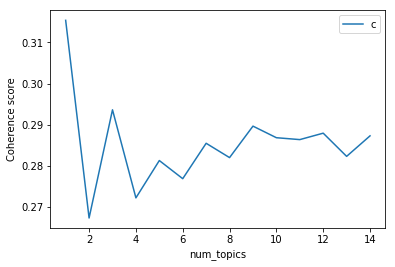

In [26]:
# Trying out different # of topics to see which gives us the highest coherence
lmlist, c_v = evaluate_graph(dictionary=dictionary, corpus=corpus, texts=body_texts, limit=15)

In [31]:
# Fitting an LDA to discussion texts
discussion_texts = []
num_topics2=5
for i in discussions:
        # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
    discussion_texts.append(stemmed_tokens)

    # turn our tokenized documents into a id <-> term dictionary
dictionary2 = corpora.Dictionary(discussion_texts)

    # convert tokenized documents into a document-term matrix
corpus2 = [dictionary2.doc2bow(text) for text in discussion_texts]

ldamodel2 = gensim.models.ldamodel.LdaModel(corpus2, num_topics=num_topics2, iterations=50, id2word = dictionary2)
print(ldamodel2.print_topics(num_topics=num_topics2, num_words=1))
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel2, corpus2, dictionary2)

[(0, '0.021*"symptom"'), (1, '0.020*"disord"'), (2, '0.024*"symptom"'), (3, '0.017*"disord"'), (4, '0.027*"disord"')]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
4      38.677920        1       1  0.013432  0.000622
2      27.029452        1       2 -0.005532 -0.006599
0      16.881346        1       3  0.005439 -0.010905
1       9.418199        1       4  0.002741  0.015192
3       7.993083        1       5 -0.016080  0.001691, topic_info=     Category        Freq        Term       Total  loglift  logprob
term                                                               
74    Default  414.000000      disord  414.000000  30.0000  30.0000
406   Default  229.000000     depress  229.000000  29.0000  29.0000
246   Default  362.000000     symptom  362.000000  28.0000  28.0000
157   Default  117.000000       medic  117.000000  27.0000  27.0000
15    Default  127.000000        also  127.000000  26.0000  26.0000
413   Default   89.000000      episod   89.000000  25.0000  25.0000
389   Default  114.000000     anxieti  114.000000  24.0000  24.0000
30    Default   77.000000    behavior   77.000000  23.0000  23.0000
1361  Default   14.000000  postpartum   14.000000  22.0000  22.0000
114   Default   80.000000     histori   80.000000  21.0000  21.0000
155   Default   88.000000         may   88.000000  20.0000  20.0000
62    Default   84.000000    criteria   84.000000  19.0000  19.0000
39    Default   51.000000        caus   51.000000  18.0000  18.0000
697   Default   71.000000     bipolar   71.000000  17.0000  17.0000
71    Default  170.000000    diagnosi  170.000000  16.0000  16.0000
260   Default  128.000000         use  128.000000  15.0000  15.0000
646   Default   25.000000    psychosi   25.000000  14.0000  14.0000
433   Default   77.000000        mood   77.000000  13.0000  13.0000
16    Default   81.000000    although   81.000000  12.0000  12.0000
236   Default   69.000000      social   69.000000  11.0000  11.0000
230   Default   61.000000       sever   61.000000  10.0000  10.0000
975   Default   51.000000      sexual   51.000000   9.0000   9.0000
144   Default   65.000000        like   65.000000   8.0000   8.0000
441   Default  115.000000     patient  115.000000   7.0000   7.0000
741   Default   76.000000    substanc   76.000000   6.0000   6.0000
721   Default   72.000000       major   72.000000   5.0000   5.0000
122   Default   41.000000      import   41.000000   4.0000   4.0000
24    Default   54.000000      associ   54.000000   3.0000   3.0000
177   Default   48.000000       often   48.000000   2.0000   2.0000
37    Default   70.000000        case   70.000000   1.0000   1.0000
...       ...         ...         ...         ...      ...      ...
688    Topic5    2.778467       young   17.338236   0.6956  -6.3323
114    Topic5    8.770462     histori   80.543399   0.3092  -5.1828
230    Topic5    7.078888       sever   61.606029   0.3630  -5.3971
413    Topic5    9.139718      episod   89.727628   0.2424  -5.1416
697    Topic5    7.464089     bipolar   71.609735   0.2655  -5.3441
190    Topic5    4.781606      period   38.981636   0.4283  -5.7895
74     Topic5   25.807445      disord  414.908200  -0.2508  -4.1036
433    Topic5    7.680704        mood   77.521770   0.2147  -5.3155
122    Topic5    4.892039      import   41.391352   0.3911  -5.7666
80     Topic5    3.300505       earli   24.024774   0.5416  -6.1602
246    Topic5   21.876188     symptom  362.306631  -0.2805  -4.2688
157    Topic5    9.782573       medic  117.050653   0.0446  -5.0736
30     Topic5    7.210079    behavior   77.667957   0.1496  -5.3788
71     Topic5   12.000958    diagnosi  170.373668  -0.1264  -4.8693
144    Topic5    6.218397        like   65.650620   0.1698  -5.5267
252    Topic5    5.151366   treatment   49.732521   0.2592  -5.7150
339    Topic5    6.444255     present   71.287418   0.1231  -5.4911
441    Topic5    8.549166     patient  115.887547  -0.0802  -5.2084
177    Topic5    5.026666       often   48.918431   0.2512  -5.7395
389    Topic5    8.268582     anxieti  114.

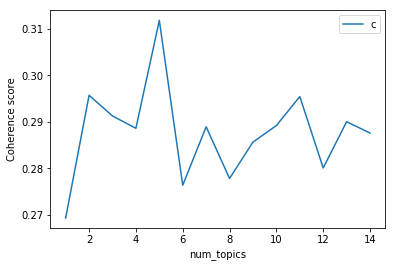

In [30]:
# Trying out different # of topics to see which gives us the highest coherence
lmlist, c_v = evaluate_graph(dictionary=dictionary2, corpus=corpus2, texts=discussion_texts, limit=15)


In [32]:
ldatopics2 = ldamodel2.show_topics(formatted=False)
ldatopics2

[(0,
  [('symptom', 0.021467252),
   ('disord', 0.015981024),
   ('depress', 0.010392591),
   ('diagnosi', 0.0064507481),
   ('also', 0.0064195003),
   ('medic', 0.0061253286),
   ('use', 0.006121438),
   ('patient', 0.0058751255),
   ('anxieti', 0.0057651871),
   ('can', 0.0054803351)]),
 (1,
  [('disord', 0.019899093),
   ('symptom', 0.012235005),
   ('depress', 0.010932267),
   ('medic', 0.0085250875),
   ('also', 0.0084696235),
   ('anxieti', 0.0072375038),
   ('may', 0.0070089707),
   ('use', 0.0062213549),
   ('episod', 0.0060250978),
   ('diagnosi', 0.0059617185)]),
 (2,
  [('symptom', 0.024378655),
   ('disord', 0.018111076),
   ('depress', 0.01345269),
   ('diagnosi', 0.0093431817),
   ('can', 0.0070548067),
   ('also', 0.0068052961),
   ('use', 0.0064541306),
   ('bipolar', 0.0055775321),
   ('patient', 0.0051630558),
   ('medic', 0.0048470059)]),
 (3,
  [('disord', 0.016513513),
   ('depress', 0.014160179),
   ('symptom', 0.013998005),
   ('diagnosi', 0.0076791015),
   ('med

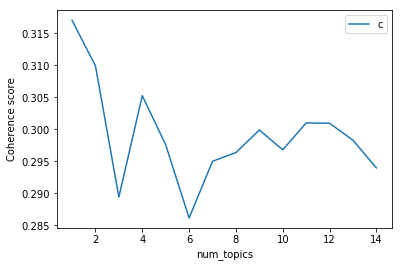

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x    y
topic                                           
1      52.160973        1       1  0.005738  0.0
0      47.839027        1       2 -0.005738  0.0, topic_info=     Category        Freq       Term       Total  loglift  logprob
term                                                              
28    Default  134.000000   although  134.000000  30.0000  30.0000
3846  Default   30.000000       zack   30.000000  29.0000  29.0000
1393  Default   48.000000      panic   48.000000  28.0000  28.0000
1146  Default   23.000000      baker   23.000000  27.0000  27.0000
114   Default  431.000000     disord  431.000000  26.0000  26.0000
296   Default   71.000000     period   71.000000  25.0000  25.0000
696   Default  137.000000     episod  137.000000  24.0000  24.0000
1612  Default   65.000000     sexual   65.000000  23.0000  23.0000
1267  Default   57.000000        eat   57.000000  22.0000  22.0000
179   Default  148.000000    histori  148.000000  21.0000  21.0000
1353  Default   33.000000     attack   33.000000  20.0000  20.0000
619   Default   80.000000     suicid   80.000000  19.0000  19.0000
340   Default  115.000000     report  115.000000  18.0000  18.0000
35    Default  150.000000     appear  150.000000  17.0000  17.0000
423   Default  176.000000        use  176.000000  16.0000  16.0000
759   Default  124.000000       mood  124.000000  15.0000  15.0000
255   Default  130.000000      month  130.000000  14.0000  14.0000
873   Default   25.000000      daphn   25.000000  13.0000  13.0000
1761  Default   12.000000      jacob   12.000000  12.0000  12.0000
1751  Default   12.000000     dereal   12.000000  11.0000  11.0000
3415  Default   11.000000       adam   11.000000  10.0000  10.0000
792   Default   22.000000     return   22.000000   9.0000   9.0000
1463  Default   24.000000    husband   24.000000   8.0000   8.0000
4044  Default   19.000000      olsen   19.000000   7.0000   7.0000
945   Default  147.000000      sleep  147.000000   6.0000   6.0000
3669  Default   19.000000        uma   19.000000   5.0000   5.0000
1296  Default   22.000000   maintain   22.000000   4.0000   4.0000
223   Default   45.000000       lead   45.000000   3.0000   3.0000
465   Default   23.000000    brandon   23.000000   2.0000   2.0000
410   Default   53.000000        tri   53.000000   1.0000   1.0000
...       ...         ...        ...         ...      ...      ...
397    Topic2  212.079622    symptom  425.099040   0.0420  -4.4124
223    Topic2   27.437900       lead   45.869877   0.2234  -6.4575
945    Topic2   79.157315      sleep  147.434308   0.1154  -5.3979
585    Topic2   69.375127  psychiatr  128.558211   0.1205  -5.5299
353    Topic2   61.758361       said  115.070506   0.1150  -5.6462
109    Topic2   45.544425    diagnos   81.820355   0.1515  -5.9507
579    Topic2   49.884457    present   91.701900   0.1285  -5.8597
655    Topic2   81.005131    anxieti  160.878246   0.0512  -5.3749
136    Topic2   41.421334      evalu   74.626454   0.1486  -6.0456
683    Topic2  149.807650    depress  336.884497  -0.0731  -4.7600
24     Topic2   57.487080        age  109.666136   0.0914  -5.7178
1148   Topic2   43.590284    bipolar   80.014875   0.1300  -5.9945
1640   Topic2   39.357981     weight   71.029493   0.1469  -6.0967
197    Topic2   39.421210      indic   71.925308   0.1360  -6.0951
436    Topic2   84.244148       year  181.495367  -0.0302  -5.3357
820    Topic2   44.491518    thought   83.603031   0.1065  -5.9741
27     Topic2   82.513033       also  181.482222  -0.0509  -5.3564
96     Topic2   46.311142   criteria   88.988813   0.0842  -5.9340
403    Topic2   76.448002       time  169.796966  -0.0607  -5.4328
768    Topic2   71.734174    patient  159.017262  -0.0587  -5.4964
250    Topic2   84.481834      medic  199.403706  -0.1215  -5.3328
60     Topic2   60.903717        can  130.284588  -0.0231  -5.6601
110    Topic2   76.225465   diagnosi  179.643866  -0.1200  -5.4357
54     To

In [35]:
# Doing the same for all_text
all_texts = []
num_topics3=2
for i in all_text:
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in en_stop]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    all_texts.append(stemmed_tokens)

dictionary3 = corpora.Dictionary(all_texts)
corpus3 = [dictionary3.doc2bow(text) for text in all_texts]

lmlist, c_v = evaluate_graph(dictionary=dictionary3, corpus=corpus3, texts=all_texts, limit=15)

ldamodel3 = gensim.models.ldamodel.LdaModel(corpus3, num_topics=num_topics3, iterations=50, id2word = dictionary3)
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel3, corpus3, dictionary3)

In [36]:
ldatopics3 = ldamodel3.show_topics(formatted=False)
ldatopics3

[(0,
  [('disord', 0.013129454),
   ('symptom', 0.0121258),
   ('depress', 0.008565357),
   ('histori', 0.0048303939),
   ('medic', 0.0048303078),
   ('year', 0.0048167179),
   ('appear', 0.0047647338),
   ('also', 0.0047177402),
   ('although', 0.0047005527),
   ('anxieti', 0.0046315249)]),
 (1,
  [('symptom', 0.011170364),
   ('disord', 0.010585503),
   ('depress', 0.0098099811),
   ('medic', 0.0060263011),
   ('use', 0.005846242),
   ('diagnosi', 0.0054230792),
   ('also', 0.0051897704),
   ('year', 0.0050996831),
   ('time', 0.0048950557),
   ('patient', 0.0045769718)])]

In [38]:
# Coherence
# WE want it to be a high number
coherence1 = CoherenceModel(model=ldamodel, corpus=corpus, dictionary=dictionary, coherence='u_mass')
coherence2 = CoherenceModel(model=ldamodel2, corpus=corpus2, dictionary=dictionary2, coherence='u_mass')
coherence3 = CoherenceModel(model=ldamodel3, corpus=corpus3, dictionary=dictionary3, coherence='u_mass')

print (coherence1.get_coherence())
print (coherence2.get_coherence())
print (coherence3.get_coherence())

# So the last (combined) text is the most coherent


-0.468102022287
-0.54478848655
-0.207951104631


In [39]:
coherence1cv = CoherenceModel(model=ldamodel, texts=body_texts, dictionary=dictionary, coherence='c_v')
coherence2cv = CoherenceModel(model=ldamodel2, texts=discussion_texts, dictionary=dictionary2, coherence='c_v')
coherence3cv = CoherenceModel(model=ldamodel3, texts=all_texts, dictionary=dictionary3, coherence='c_v')

print (coherence1cv.get_coherence())
print (coherence2cv.get_coherence())
print (coherence3cv.get_coherence())

#Again, the last combined text is the most coherent

0.290511661365
0.287264809458
0.313051299356
